In [26]:
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_core.prompts import PromptTemplate
from langchain.chains import RetrievalQA
from langchain_core.output_parsers import StrOutputParser
load_dotenv()

True

In [2]:
from ragatouille import RAGPretrainedModel
RAG = RAGPretrainedModel.from_pretrained("colbert-ir/colbertv2.0")

[Jun 12, 08:05:46] Loading segmented_maxsim_cpp extension (set COLBERT_LOAD_TORCH_EXTENSION_VERBOSE=True for more info)...


/Users/siddartha/miniforge3/lib/python3.10/site-packages/torch/cuda/amp/grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


In [3]:
from langchain.document_loaders import PyPDFLoader
file_path = "policy_data.pdf"
loader = PyPDFLoader(file_path)
pages = loader.load()

In [4]:
len(pages)

44

In [5]:
full_document = ""
for page in pages:
    full_document += page.page_content

In [6]:
full_document

'Your car insurance \npolicy booklet\nPage 2FAQs  3\nGlossary  4\nMaking a claim  6\nWhat your cover includes  8\nSection 1: Liability  11\nSection 2: Fire and theft  14\nSection 3: Courtesy car  17\nSection 4: Accidental damage  18\nSection 5: Windscreen damage  20\nSection 6: Personal benefits  21\nSection 7: Motor Legal Cover  23\nSection 8: Guaranteed Hire Car Plus  28\nSection 9: Protected No Claim Discount  30Where you can drive  31\nLosses we don’t cover  33\nOther conditions you need to know about  36\nHow the policy works  37\nEverything else  41\nIf you have a complaint  42\nIf you’re in an accident  43\nHow to get in touch  Back coverContentsWelcome to Churchill\nThis booklet tells you about your car insurance\nAbout the policy\nThe policy is made up of:\n >This booklet.\n >Your car insurance details.\n >Your certificate (or certificates)  \nof motor insurance.\nIf the policy includes Green Flag breakdown cover:\n >Your breakdown cover and your car \ninsurance are part of th

In [7]:
RAG.index(
    collection=[full_document],
    index_name="policy_data",
    max_document_length=512,
    split_documents=True,
)

---- WARNING! You are using PLAID with an experimental replacement for FAISS for greater compatibility ----
This is a behaviour change from RAGatouille 0.8.0 onwards.
This works fine for most users and smallish datasets, but can be considerably slower than FAISS and could cause worse results in some situations.
If you're confident with FAISS working on your machine, pass use_faiss=True to revert to the FAISS-using behaviour.
--------------------


[Jun 12, 08:05:50] #> Note: Output directory .ragatouille/colbert/indexes/policy_data already exists


[Jun 12, 08:05:50] #> Will delete 10 files already at .ragatouille/colbert/indexes/policy_data in 20 seconds...
[Jun 12, 08:06:11] [0] 		 #> Encoding 54 passages..


  0%|          | 0/2 [00:00<?, ?it/s]/Users/siddartha/miniforge3/lib/python3.10/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
 50%|█████     | 1/2 [00:06<00:06,  6.05s/it]/Users/siddartha/miniforge3/lib/python3.10/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
100%|██████████| 2/2 [00:09<00:00,  4.92s/it]

[Jun 12, 08:06:21] [0] 		 avg_doclen_est = 418.2962951660156 	 len(local_sample) = 54
[Jun 12, 08:06:21] [0] 		 Creating 2,048 partitions.
[Jun 12, 08:06:21] [0] 		 *Estimated* 22,587 embeddings.
[Jun 12, 08:06:21] [0] 		 #> Saving the indexing plan to .ragatouille/colbert/indexes/policy_data/plan.json ..


used 18 iterations (2.0859s) to cluster 21459 items into 2048 clusters
[0.025, 0.028, 0.026, 0.025, 0.025, 0.025, 0.025, 0.026, 0.025, 0.026, 0.024, 0.027, 0.027, 0.028, 0.028, 0.026, 0.025, 0.027, 0.024, 0.024, 0.024, 0.024, 0.027, 0.025, 0.023, 0.028, 0.026, 0.027, 0.029, 0.029, 0.028, 0.03, 0.026, 0.027, 0.025, 0.023, 0.025, 0.03, 0.029, 0.032, 0.031, 0.026, 0.025, 0.028, 0.026, 0.025, 0.027, 0.029, 0.031, 0.025, 0.023, 0.026, 0.03, 0.026, 0.025, 0.027, 0.028, 0.027, 0.031, 0.025, 0.026, 0.028, 0.027, 0.026, 0.028, 0.029, 0.026, 0.027, 0.023, 0.027, 0.028, 0.024, 0.025, 0.026, 0.025, 0.027, 0.028, 0.025, 0.026, 0.025, 0.027, 0.026, 0.026, 0.028, 0.024, 0.024, 0.027, 0.027, 0.026, 0.031, 0.026, 0.027, 0.025, 0.027, 0.027, 0.028, 0.031, 0.028, 0.026, 0.025, 0.025, 0.033, 0.026, 0.028, 0.027, 0.024, 0.025, 0.028, 0.025, 0.026, 0.028, 0.027, 0.028, 0.024, 0.028, 0.026, 0.026, 0.027, 0.025, 0.027, 0.025, 0.025, 0.025, 0.027, 0.025, 0.028, 0.025, 0.025]


0it [00:00, ?it/s]

[Jun 12, 08:06:23] [0] 		 #> Encoding 54 passages..


100%|██████████| 2/2 [00:08<00:00,  4.41s/it]
1it [00:08,  8.91s/it]
100%|██████████| 1/1 [00:00<00:00, 1081.01it/s]

[Jun 12, 08:06:32] #> Optimizing IVF to store map from centroids to list of pids..
[Jun 12, 08:06:32] #> Building the emb2pid mapping..
[Jun 12, 08:06:32] len(emb2pid) = 22588



100%|██████████| 2048/2048 [00:00<00:00, 128118.11it/s]

[Jun 12, 08:06:32] #> Saved optimized IVF to .ragatouille/colbert/indexes/policy_data/ivf.pid.pt
Done indexing!


'.ragatouille/colbert/indexes/policy_data'

In [8]:
result = RAG.search("what is Drive Sure?", k=3)

Loading searcher for index policy_data for the first time... This may take a few seconds
[Jun 12, 08:06:33] #> Loading codec...
[Jun 12, 08:06:33] #> Loading IVF...
[Jun 12, 08:06:33] Loading segmented_lookup_cpp extension (set COLBERT_LOAD_TORCH_EXTENSION_VERBOSE=True for more info)...


/Users/siddartha/miniforge3/lib/python3.10/site-packages/torch/cuda/amp/grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


[Jun 12, 08:06:33] #> Loading doclens...


100%|██████████| 1/1 [00:00<00:00, 4306.27it/s]

[Jun 12, 08:06:33] #> Loading codes and residuals...



100%|██████████| 1/1 [00:00<00:00, 387.89it/s]

[Jun 12, 08:06:33] Loading filter_pids_cpp extension (set COLBERT_LOAD_TORCH_EXTENSION_VERBOSE=True for more info)...


[Jun 12, 08:06:33] Loading decompress_residuals_cpp extension (set COLBERT_LOAD_TORCH_EXTENSION_VERBOSE=True for more info)...
Searcher loaded!

#> QueryTokenizer.tensorize(batch_text[0], batch_background[0], bsize) ==
#> Input: . what is Drive Sure?, 		 True, 		 None
#> Output IDs: torch.Size([32]), tensor([ 101,    1, 2054, 2003, 3298, 2469, 1029,  102,  103,  103,  103,  103,
         103,  103,  103,  103,  103,  103,  103,  103,  103,  103,  103,  103,
         103,  103,  103,  103,  103,  103,  103,  103])
#> Output Mask: torch.Size([32]), tensor([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])



/Users/siddartha/miniforge3/lib/python3.10/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


In [9]:
retriever = RAG.as_langchain_retriever(k=3)

In [10]:
template = """Use the context below to answer the question.
Keep the answer concise and to the point.
If you are unsure about the answer, just say i do not know the answer to the question do not create your own answer and make sure the answer is concise and to the point.
Summarize the information such that main points are covered and if you think that there needs to be some more information added to the answer then you can add that information as well.
{context}

Question: {question}

Helpful Answer:"""
prompt = PromptTemplate.from_template(template)

In [11]:
llm = ChatOpenAI(
    model = "gpt-3.5-turbo",
    temperature = 0.4,
    max_tokens = 400,
)

In [12]:
chain_type_kwargs = {"prompt": prompt}
chain = RetrievalQA.from_chain_type(
    llm = llm,
    chain_type="stuff",
    retriever=retriever,
    chain_type_kwargs=chain_type_kwargs,
)

In [13]:
import pandas as pd
df = pd.read_excel('/Users/siddartha/Desktop/github/Athina_AI_project/dataset_testing/dataset_for_testing.xlsx')

In [14]:
questions = df["question"].to_list()
ground_truth = df["ground_truth"].to_list()

In [16]:
from datasets import Dataset
import torch

data = {"question": [], "answer": [], "contexts": [], "ground_truth": ground_truth}

for query in questions:
    data["question"].append(query)
    data["answer"].append(chain.invoke(query))
    data["contexts"].append([doc.page_content for doc in retriever.get_relevant_documents(query)])

dataset = Dataset.from_dict(data)

/Users/siddartha/miniforge3/lib/python3.10/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/Users/siddartha/miniforge3/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(
/Users/siddartha/miniforge3/lib/python3.10/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/Users/siddartha/miniforge3/lib/python3.10/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/Users/siddartha/miniforge3/lib/python3.10/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda

In [17]:
df = pd.DataFrame(dataset)

In [20]:
df['answer'] = df['answer'].apply(lambda x: x['result'])

In [21]:
dataset = Dataset.from_pandas(df)

In [37]:
import ragas
from ragas import evaluate
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
)
run_config = ragas.RunConfig(timeout=60, max_retries=10, max_wait=100, max_workers=1)

result = evaluate(
    dataset = dataset,
    llm = llm,
    embeddings=embeddings,
    run_config=run_config,
    metrics=[
        faithfulness,
        answer_relevancy,
    ],
)

Evaluating:   0%|          | 0/92 [00:00<?, ?it/s]

Failed to parse output. Returning None.
Failed to parse output. Returning None.
Failed to parse output. Returning None.
Failed to parse output. Returning None.


In [38]:
result

{'faithfulness': 0.8980, 'answer_relevancy': 0.9082}

/Users/siddartha/miniforge3/lib/python3.10/site-packages/datasets/table.py:1381: FutureWarning: promote has been superseded by promote_options='default'.
  block_group = [InMemoryTable(cls._concat_blocks(list(block_group), axis=axis))]
/Users/siddartha/miniforge3/lib/python3.10/site-packages/datasets/table.py:1407: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


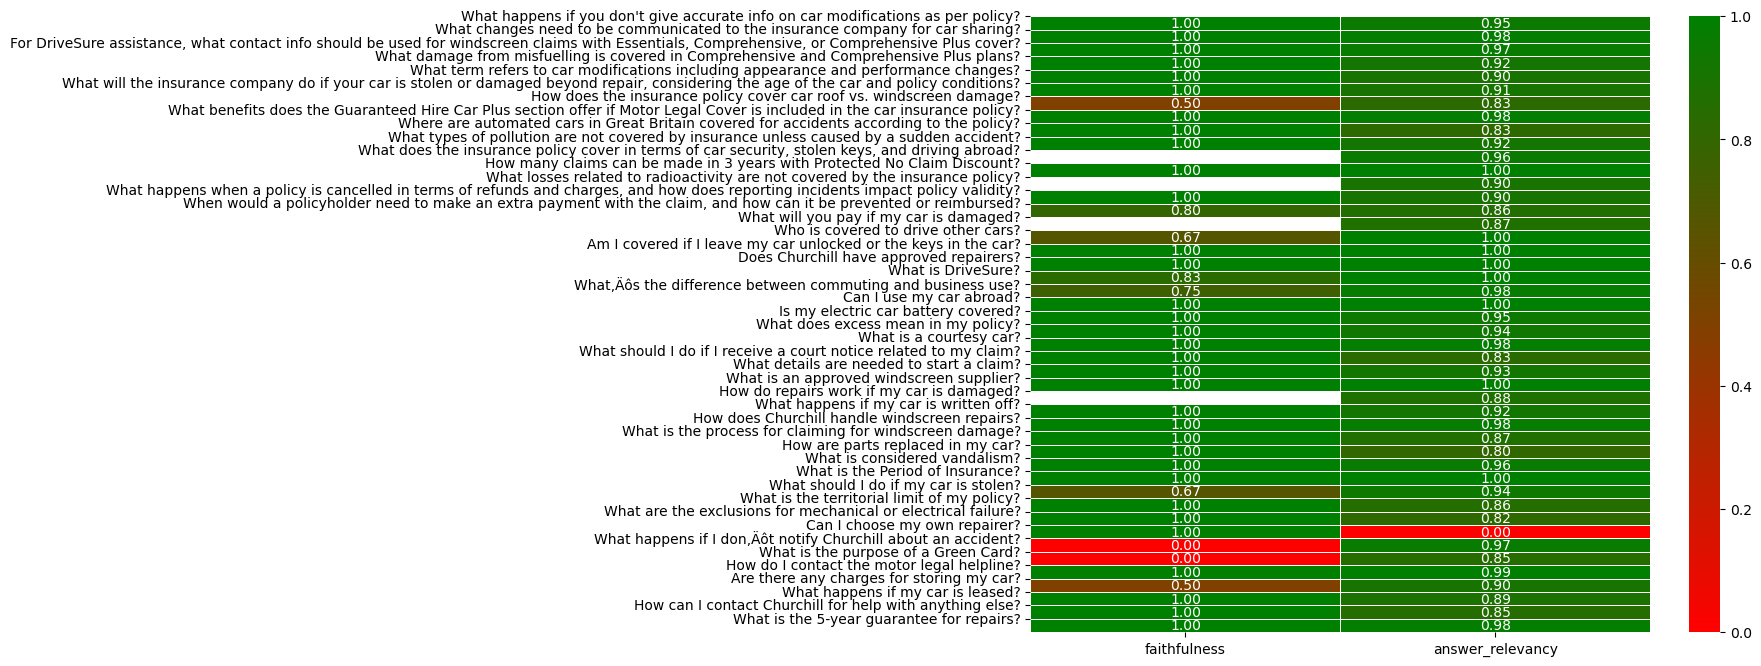

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

df = result.to_pandas()

heatmap_data = df[['faithfulness', 'answer_relevancy']]

cmap = LinearSegmentedColormap.from_list('green_red', ['red', 'green'])

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", linewidths=.5, cmap=cmap)

plt.yticks(ticks=range(len(df['question'])), labels=df['question'], rotation=0)

plt.show()